# Airbnb Price Prediction Model

### SAAD TARIQ 261008634

### Problem Description

### Solution Approach 

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import pandas as pd
import numpy as np
import gurobipy as gp
from gurobipy import *
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

### Importing Dataset

In [2]:
data = pd.read_csv('train 2.csv')

### Data Exploration

In [3]:
data.head()

id  log_price property_type        room_type  \
0   6901257   5.010635     Apartment  Entire home/apt   
1   6304928   5.129899     Apartment  Entire home/apt   
2   7919400   4.976734     Apartment  Entire home/apt   
3  13418779   6.620073         House  Entire home/apt   
4   3808709   4.744932     Apartment  Entire home/apt   

                                           amenities  accommodates  bathrooms  \
0  {"Wireless Internet","Air conditioning",Kitche...             3        1.0   
1  {"Wireless Internet","Air conditioning",Kitche...             7        1.0   
2  {TV,"Cable TV","Wireless Internet","Air condit...             5        1.0   
3  {TV,"Cable TV",Internet,"Wireless Internet",Ki...             4        1.0   
4  {TV,Internet,"Wireless Internet","Air conditio...             2        1.0   

   bed_type cancellation_policy  cleaning_fee  ...   latitude   longitude  \
0  Real Bed              strict          True  ...  40.696524  -73.991617   
1  Real Bed              strict          True  ...  40.766115  -73.989040   
2  Real Bed            moderate          True  ...  40.808110  -73.943756   
3  Real Bed            flexible          True  ...  37.772004 -122.431619   
4  Real Bed            moderate          True  ...  38.925627  -77.034596   

                                       name     neighbourhood  \
0            Beautiful brownstone 1-bedroom  Brooklyn Heights   
1  Superb 3BR Apt Located Near Times Square    Hell's Kitchen   
2                          The Garden Oasis            Harlem   
3        Beautiful Flat in the Heart of SF!      Lower Haight   
4                Great studio in midtown DC  Columbia Heights   

  number_of_reviews review_scores_rating  \
0                 2                100.0   
1                 6                 93.0   
2                10                 92.0   
3                 0                  NaN   
4                 4                 40.0   

                                       thumbnail_url  zipcode bedrooms  beds  
0  https://a0.muscache.com/im/pictures/6d7cbbf7-c...    11201      1.0   1.0  
1  https://a0.muscache.com/im/pictures/348a55fe-4...    10019      3.0   3.0  
2  https://a0.muscache.com/im/pictures/6fae5362-9...    10027      1.0   3.0  
3  https://a0.muscache.com/im/pictures/72208dad-9...  94117.0      2.0   2.0  
4                                                NaN    20009      0.0   1.0  

[5 rows x 29 columns]

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      74111 non-null  int64  
 1   log_price               74111 non-null  float64
 2   property_type           74111 non-null  object 
 3   room_type               74111 non-null  object 
 4   amenities               74111 non-null  object 
 5   accommodates            74111 non-null  int64  
 6   bathrooms               73911 non-null  float64
 7   bed_type                74111 non-null  object 
 8   cancellation_policy     74111 non-null  object 
 9   cleaning_fee            74111 non-null  bool   
 10  city                    74111 non-null  object 
 11  description             74111 non-null  object 
 12  first_review            58247 non-null  object 
 13  host_has_profile_pic    73923 non-null  object 
 14  host_identity_verified  73923 non-null

In [5]:
data.describe()

id     log_price  accommodates     bathrooms      latitude  \
count  7.411100e+04  74111.000000  74111.000000  73911.000000  74111.000000   
mean   1.126662e+07      4.782069      3.155146      1.235263     38.445958   
std    6.081735e+06      0.717394      2.153589      0.582044      3.080167   
min    3.440000e+02      0.000000      1.000000      0.000000     33.338905   
25%    6.261964e+06      4.317488      2.000000      1.000000     34.127908   
50%    1.225415e+07      4.709530      2.000000      1.000000     40.662138   
75%    1.640226e+07      5.220356      4.000000      1.000000     40.746096   
max    2.123090e+07      7.600402     16.000000      8.000000     42.390437   

          longitude  number_of_reviews  review_scores_rating      bedrooms  \
count  74111.000000       74111.000000          57389.000000  74020.000000   
mean     -92.397525          20.900568             94.067365      1.265793   
std       21.705322          37.828641              7.836556      0.852143   
min     -122.511500           0.000000             20.000000      0.000000   
25%     -118.342374           1.000000             92.000000      1.000000   
50%      -76.996965           6.000000             96.000000      1.000000   
75%      -73.954660          23.000000            100.000000      1.000000   
max      -70.985047         605.000000            100.000000     10.000000   

               beds  
count  73980.000000  
mean       1.710868  
std        1.254142  
min        0.000000  
25%        1.000000  
50%        1.000000  
75%        2.000000  
max       18.000000

In [6]:
%matplotlib inline
data.hist(bins=30, figsize=(20,15))
plt.show()

In [7]:
def bar_plot_object(title,data):
  x = list(data.value_counts().keys())
  x = x[::-1]
  y = list(data.value_counts())
  y = y[::-1]
  plt.barh(x,y)
  plt.title(title)
  return None

In [8]:
def explore_col(column):
  bar_plot_object(column+" histogram",data[column])
  print(column,'description\n', data[column].describe())
  print('Top 5 frequent:',data[column].value_counts()[:5].index.tolist())

In [9]:
def pie_col(column):
  data[column].value_counts().plot.pie(autopct='%1.0f%%')

property_type description
 count         74111
unique           35
top       Apartment
freq          49003
Name: property_type, dtype: object
Top 5 frequent: ['Apartment', 'House', 'Condominium', 'Townhouse', 'Loft']


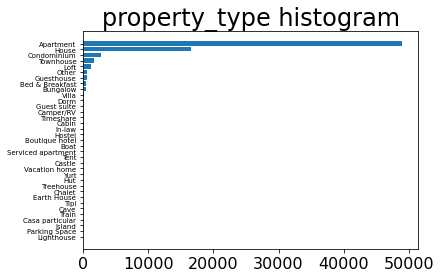

In [10]:
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 7
import matplotlib as mpl
mpl.rcParams['font.size'] = 20
explore_col('property_type')

room_type description
 count               74111
unique                  3
top       Entire home/apt
freq                41310
Name: room_type, dtype: object
Top 5 frequent: ['Entire home/apt', 'Private room', 'Shared room']


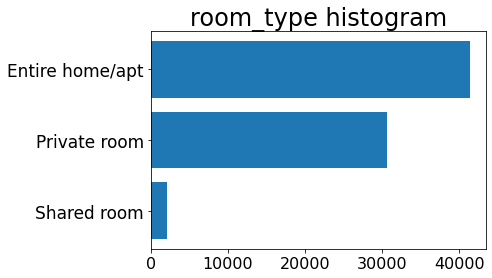

In [11]:
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 17
explore_col('room_type')

bed_type description
 count        74111
unique           5
top       Real Bed
freq         72028
Name: bed_type, dtype: object
Top 5 frequent: ['Real Bed', 'Futon', 'Pull-out Sofa', 'Airbed', 'Couch']


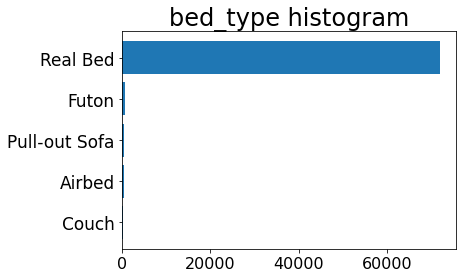

In [12]:
explore_col('bed_type')

cancellation_policy description
 count      74111
unique         5
top       strict
freq       32374
Name: cancellation_policy, dtype: object
Top 5 frequent: ['strict', 'flexible', 'moderate', 'super_strict_30', 'super_strict_60']


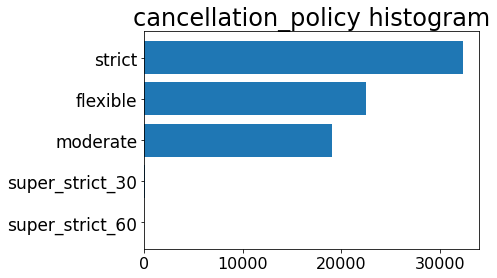

In [13]:
explore_col('cancellation_policy')

In [14]:
pie_col('cancellation_policy')

city description
 count     74111
unique        6
top         NYC
freq      32349
Name: city, dtype: object
Top 5 frequent: ['NYC', 'LA', 'SF', 'DC', 'Chicago']


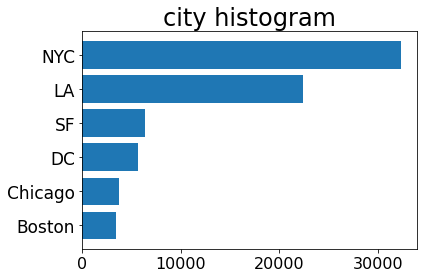

In [15]:
explore_col('city')

In [16]:
pie_col('city')

In [17]:
def plt_density(column,title=None):
  if title==None:
    title=column
  plt.figure(figsize = (15, 8))
  sns.distplot(data[column])
  plt.title(title)
  plt.show()
  return

In [18]:
years =  pd.to_datetime(data['host_since'], format='%Y-%m-%d', errors='coerce').dt.year
years.value_counts().plot.bar()

<AxesSubplot:>

<AxesSubplot:>

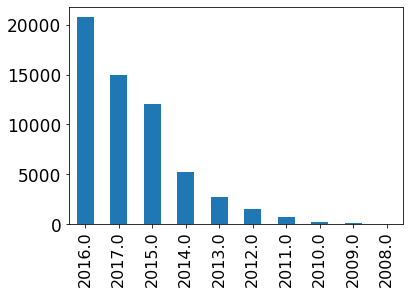

In [19]:
years =  pd.to_datetime(data['first_review'], format='%Y-%m-%d', errors='coerce').dt.year
years.value_counts().plot.bar()

In [20]:
plt.rcParams['xtick.labelsize'] = 16

#explore_col('neighbourhood')
#pie_col('neighbourhood')
neighbourhood_morethan_1000 = data.neighbourhood.value_counts()
neighbourhood_morethan_1000 [neighbourhood_morethan_1000 >1000].plot.pie(autopct='%1.0f%%')

<AxesSubplot:ylabel='neighbourhood'>

In [21]:
neighbourhood_morethan_1000 [neighbourhood_morethan_1000 >1000].plot.bar()

<AxesSubplot:>

In [22]:
import seaborn as sns
years_of_host_created = pd.DataFrame({
    'year of host created':pd.to_datetime(data['host_since'], format='%Y-%m-%d', errors='coerce').dt.year.fillna(0),
    'log_price': data['log_price']
})
plt.figure(figsize=(12,4))

sns.countplot(x="year of host created", data=years_of_host_created)
plt.title('Host since')
plt.show()

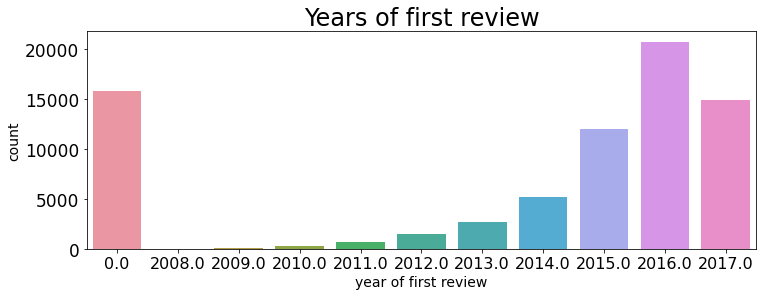

In [23]:
years_of_first_review = pd.DataFrame({
    'year of first review':pd.to_datetime(data['first_review'], format='%Y-%m-%d', errors='coerce').dt.year.fillna(0),
    'log_price': data['log_price']
})
plt.figure(figsize=(12,4))

sns.countplot(x="year of first review", data=years_of_first_review)
plt.title('Years of first review')
plt.show()


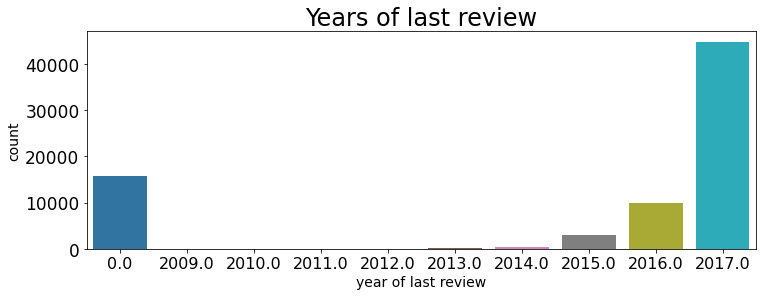

In [24]:
years_of_last_review = pd.DataFrame({
    'year of last review':pd.to_datetime(data['last_review'], format='%Y-%m-%d', errors='coerce').dt.year.fillna(0),
    'log_price': data['log_price']
})
plt.figure(figsize=(12,4))

sns.countplot(x="year of last review", data=years_of_last_review)
plt.title('Years of last review')
plt.show()

In [25]:
data.accommodates.value_counts().plot.bar()
plt.title('People Accommodated')

Text(0.5, 1.0, 'People Accommodated')

Text(0.5, 1.0, 'Bathrooms per Airbnb')

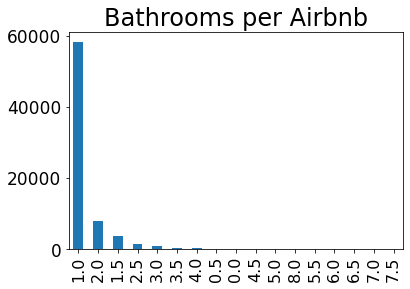

In [26]:
data.bathrooms.value_counts().plot.bar()
plt.title('Bathrooms per Airbnb')

In [27]:
#explore_col('host_response_rate')
host_response_rate = data.host_response_rate.value_counts()
explode = (0.1, 0.2, 0.1)
host_response_rate [host_response_rate > 1000].plot.pie(shadow=True, startangle=90,autopct='%1.0f%%')

<AxesSubplot:ylabel='host_response_rate'>

Text(0.5, 1.0, 'Bedrooms per Airbnb')

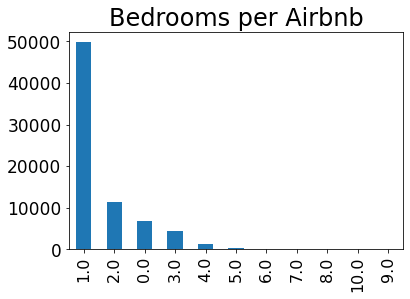

In [28]:
data.bedrooms.value_counts().plot.bar()
plt.title('Bedrooms per Airbnb')

In [29]:
data.beds.value_counts().plot.bar()
plt.title('Beds per Airbnb')

Text(0.5, 1.0, 'Beds per Airbnb')

/Users/saadtariq/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


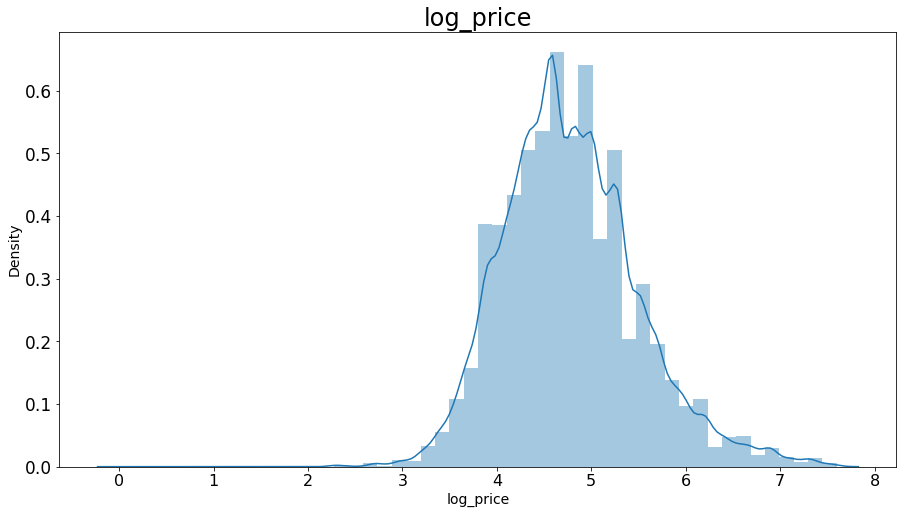

In [30]:
plt_density('log_price')

<AxesSubplot:>

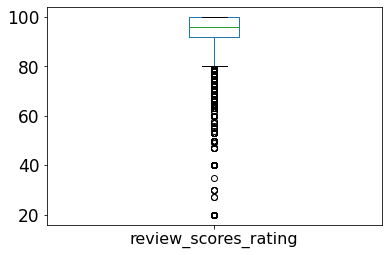

In [31]:
data.review_scores_rating.plot.box()

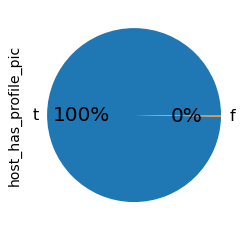

In [32]:
pie_col('host_has_profile_pic')

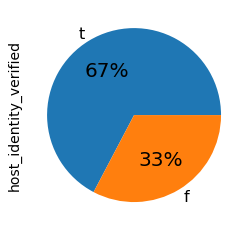

In [33]:
pie_col('host_identity_verified')

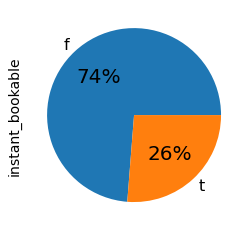

In [34]:
pie_col('instant_bookable')

<AxesSubplot:>

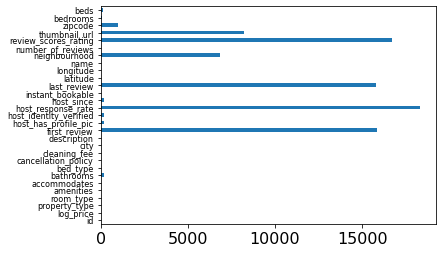

In [35]:
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 8
data.isnull().sum().plot.barh()

In [36]:
import plotly.express as px
def create_map(city):
    price_view = lambda x: 'price: ' + str(round(x, 2))

    if city in {'NYC', 'LA'}:
        fraction = 0.2
    else:
        fraction = 0.6
        
    df_temp = data[data['city'] == city].sample(frac=fraction,random_state=101)
    df_temp['log_price'] = np.round(df_temp['log_price'], 2)
    
    fig = px.scatter_mapbox(df_temp, 
                            lat="latitude", 
                            lon="longitude", 
                            hover_data=["log_price"],
                            color='log_price', 
                            zoom=10)
    
    fig.update_layout(
            title = f'Airbnb prices in {city}',
            geo_scope='usa',
            width=1000, 
            height=600,
            mapbox_style="white-bg",
            mapbox_layers=[{
                 "below": 'traces',
                 "sourcetype": "raster",
                 "sourceattribution": "United States Geological Survey",
                 "source": ["https://basemap.nationalmap.gov/arcgis/rest/services/USGSImageryOnly/MapServer/tile/{z}/{y}/{x}"]
              }]
    )
    #fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
    #fig.update_geos(fitbounds="locations")
    fig.show()
    
#city = interact(lambda x: create_map(x), x=['NYC', 'LA', 'SF', 'DC', 'Chicago', 'Boston'])  #widget
create_map('NYC')

### Selecting Relevant Columns

In [37]:
data = data.iloc[:, [1,2,3,4,5,6,7,8,9,10,13,14,16,17,23,24,27,28]]

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   log_price               74111 non-null  float64
 1   property_type           74111 non-null  object 
 2   room_type               74111 non-null  object 
 3   amenities               74111 non-null  object 
 4   accommodates            74111 non-null  int64  
 5   bathrooms               73911 non-null  float64
 6   bed_type                74111 non-null  object 
 7   cancellation_policy     74111 non-null  object 
 8   cleaning_fee            74111 non-null  bool   
 9   city                    74111 non-null  object 
 10  host_has_profile_pic    73923 non-null  object 
 11  host_identity_verified  73923 non-null  object 
 12  host_since              73923 non-null  object 
 13  instant_bookable        74111 non-null  object 
 14  number_of_reviews       74111 non-null

### Looking for correlations

In [39]:
corr_matrix = data.corr()

In [40]:
corr_matrix["log_price"].sort_values(ascending=False)

log_price               1.000000
accommodates            0.567574
bedrooms                0.473212
beds                    0.442153
bathrooms               0.355420
cleaning_fee            0.111191
review_scores_rating    0.091219
number_of_reviews      -0.032470
Name: log_price, dtype: float64

In [41]:
# from pandas.tools.plotting import scatter_matrix # For older versions of Pandas
from pandas.plotting import scatter_matrix

attributes = ["log_price", "accommodates", "bedrooms",
              "beds"]
scatter_matrix(data[attributes], figsize=(12, 8))
save_fig("scatter_matrix_plot")

Saving figure scatter_matrix_plot


In [42]:
data["beds_per_bedroom"] = data["beds"]/data["bedrooms"]
data["accommodates_per_room"] = data["accommodates"]/data["bedrooms"]
data["accommodates_share_bathroom"]=data["accommodates"]/data["bathrooms"]

In [43]:
corr_matrix = data.corr()
corr_matrix["log_price"].sort_values(ascending=False)

log_price                      1.000000
accommodates                   0.567574
bedrooms                       0.473212
beds                           0.442153
accommodates_share_bathroom    0.382338
bathrooms                      0.355420
accommodates_per_room          0.237595
cleaning_fee                   0.111191
review_scores_rating           0.091219
beds_per_bedroom               0.049241
number_of_reviews             -0.032470
Name: log_price, dtype: float64

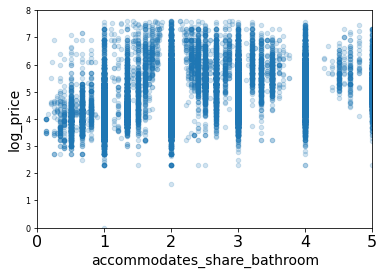

In [44]:
data.plot(kind="scatter", x="accommodates_share_bathroom", y="log_price",
             alpha=0.2)
plt.axis([0, 5, 0, 8])
plt.show()

In [45]:
data.describe()

log_price  accommodates     bathrooms  number_of_reviews  \
count  74111.000000  74111.000000  73911.000000       74111.000000   
mean       4.782069      3.155146      1.235263          20.900568   
std        0.717394      2.153589      0.582044          37.828641   
min        0.000000      1.000000      0.000000           0.000000   
25%        4.317488      2.000000      1.000000           1.000000   
50%        4.709530      2.000000      1.000000           6.000000   
75%        5.220356      4.000000      1.000000          23.000000   
max        7.600402     16.000000      8.000000         605.000000   

       review_scores_rating      bedrooms          beds  beds_per_bedroom  \
count          57389.000000  74020.000000  73980.000000           73916.0   
mean              94.067365      1.265793      1.710868               inf   
std                7.836556      0.852143      1.254142               NaN   
min               20.000000      0.000000      0.000000               0.0   
25%               92.000000      1.000000      1.000000               1.0   
50%               96.000000      1.000000      1.000000               1.0   
75%              100.000000      1.000000      2.000000               2.0   
max              100.000000     10.000000     18.000000               inf   

       accommodates_per_room  accommodates_share_bathroom  
count                74020.0                    73911.000  
mean                     inf                          inf  
std                      NaN                          NaN  
min                      0.2                        0.125  
25%                      2.0                        2.000  
50%                      2.0                        2.000  
75%                      3.0                        3.000  
max                      inf                          inf

## PREPARE DATA FOR MACHINE LEARNING ALGORITHMS

### DATA CLEANING

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   log_price                    74111 non-null  float64
 1   property_type                74111 non-null  object 
 2   room_type                    74111 non-null  object 
 3   amenities                    74111 non-null  object 
 4   accommodates                 74111 non-null  int64  
 5   bathrooms                    73911 non-null  float64
 6   bed_type                     74111 non-null  object 
 7   cancellation_policy          74111 non-null  object 
 8   cleaning_fee                 74111 non-null  bool   
 9   city                         74111 non-null  object 
 10  host_has_profile_pic         73923 non-null  object 
 11  host_identity_verified       73923 non-null  object 
 12  host_since                   73923 non-null  object 
 13  instant_bookable

In [47]:
data.head()

log_price property_type        room_type  \
0   5.010635     Apartment  Entire home/apt   
1   5.129899     Apartment  Entire home/apt   
2   4.976734     Apartment  Entire home/apt   
3   6.620073         House  Entire home/apt   
4   4.744932     Apartment  Entire home/apt   

                                           amenities  accommodates  bathrooms  \
0  {"Wireless Internet","Air conditioning",Kitche...             3        1.0   
1  {"Wireless Internet","Air conditioning",Kitche...             7        1.0   
2  {TV,"Cable TV","Wireless Internet","Air condit...             5        1.0   
3  {TV,"Cable TV",Internet,"Wireless Internet",Ki...             4        1.0   
4  {TV,Internet,"Wireless Internet","Air conditio...             2        1.0   

   bed_type cancellation_policy  cleaning_fee city  ...  \
0  Real Bed              strict          True  NYC  ...   
1  Real Bed              strict          True  NYC  ...   
2  Real Bed            moderate          True  NYC  ...   
3  Real Bed            flexible          True   SF  ...   
4  Real Bed            moderate          True   DC  ...   

  host_identity_verified  host_since instant_bookable number_of_reviews  \
0                      t  2012-03-26                f                 2   
1                      f  2017-06-19                t                 6   
2                      t  2016-10-25                t                10   
3                      t  2015-04-19                f                 0   
4                      t  2015-03-01                t                 4   

   review_scores_rating  bedrooms  beds  beds_per_bedroom  \
0                 100.0       1.0   1.0               1.0   
1                  93.0       3.0   3.0               1.0   
2                  92.0       1.0   3.0               3.0   
3                   NaN       2.0   2.0               1.0   
4                  40.0       0.0   1.0               inf   

   accommodates_per_room  accommodates_share_bathroom  
0               3.000000                          3.0  
1               2.333333                          7.0  
2               5.000000                          5.0  
3               2.000000                          4.0  
4                    inf                          2.0  

[5 rows x 21 columns]

In [48]:
data = data.drop(columns=["beds_per_bedroom","accommodates_per_room","accommodates_share_bathroom","host_has_profile_pic"])

In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   log_price               74111 non-null  float64
 1   property_type           74111 non-null  object 
 2   room_type               74111 non-null  object 
 3   amenities               74111 non-null  object 
 4   accommodates            74111 non-null  int64  
 5   bathrooms               73911 non-null  float64
 6   bed_type                74111 non-null  object 
 7   cancellation_policy     74111 non-null  object 
 8   cleaning_fee            74111 non-null  bool   
 9   city                    74111 non-null  object 
 10  host_identity_verified  73923 non-null  object 
 11  host_since              73923 non-null  object 
 12  instant_bookable        74111 non-null  object 
 13  number_of_reviews       74111 non-null  int64  
 14  review_scores_rating    57389 non-null

In [50]:
data = data.dropna(subset=["bathrooms"])
data =data.dropna(subset=["host_identity_verified"])
data =data.dropna(subset=["host_since"])
data =data.dropna(subset=["bedrooms"])
data =data.dropna(subset=["beds"])

In [51]:
def col_price(column):
  plot_data = pd.DataFrame({
      'data': data[column],
      'log_price': data.log_price
  })
  sns.countplot(x="data", data=plot_data)
  plt.title(column+' with log price')
  plt.show()


  plt.figure(figsize=(12,8))
  g = sns.boxplot(data=plot_data,orient='v', x = 'data', y = 'log_price')
  plt.title(column+' with log price')
  plt.show()
  return g

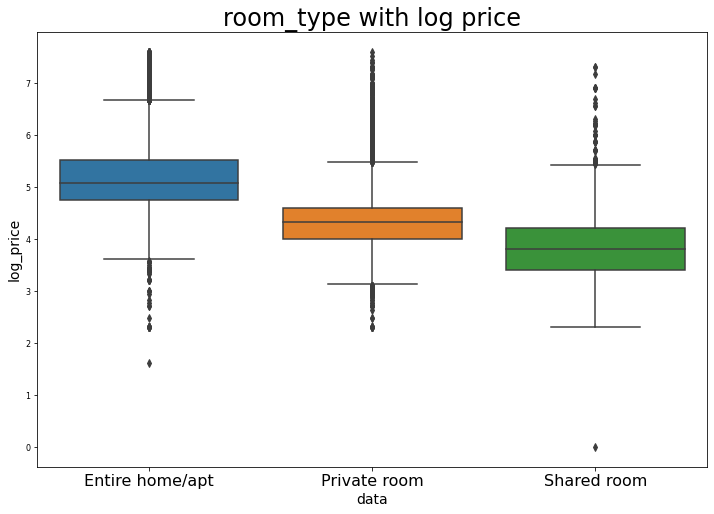

<AxesSubplot:title={'center':'room_type with log price'}, xlabel='data', ylabel='log_price'>

In [52]:
col_price('room_type')

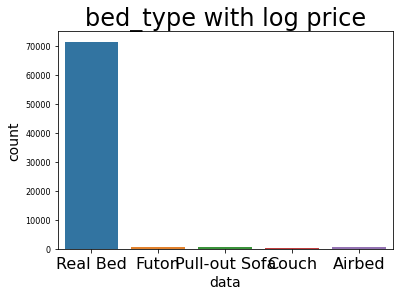

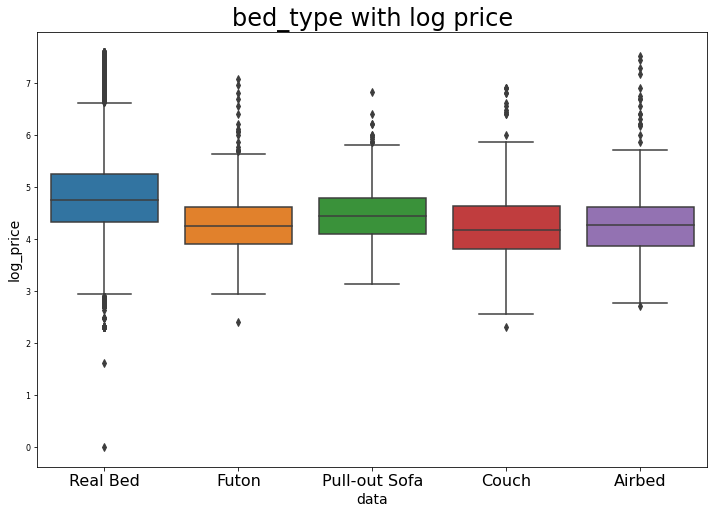

<AxesSubplot:title={'center':'bed_type with log price'}, xlabel='data', ylabel='log_price'>

In [53]:
col_price('bed_type')

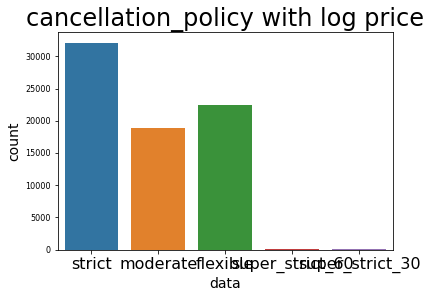

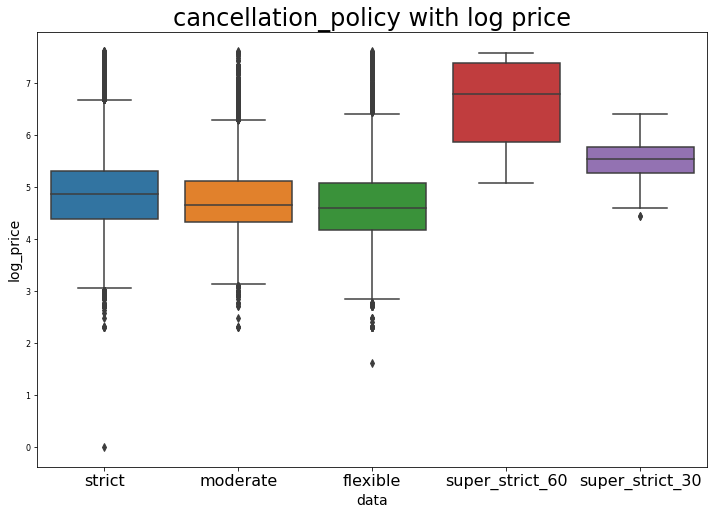

<AxesSubplot:title={'center':'cancellation_policy with log price'}, xlabel='data', ylabel='log_price'>

In [54]:
col_price('cancellation_policy')

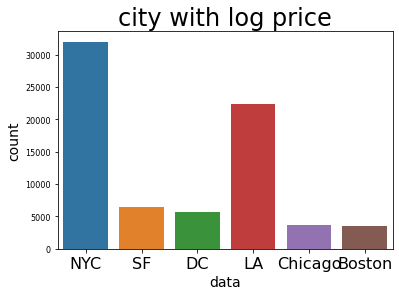

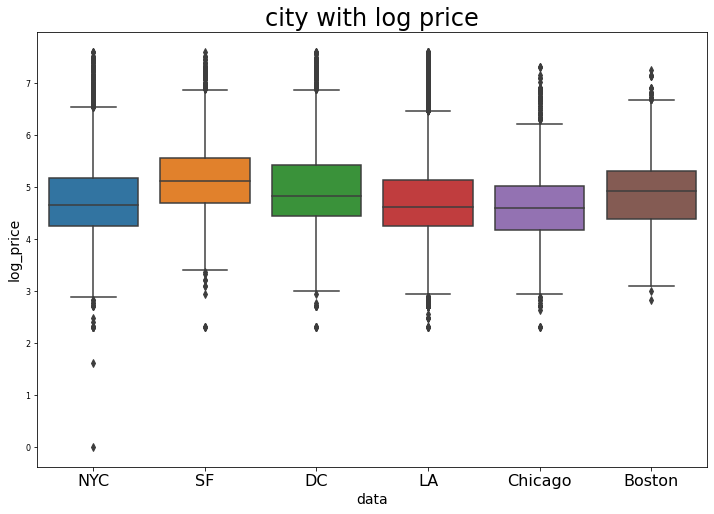

<AxesSubplot:title={'center':'city with log price'}, xlabel='data', ylabel='log_price'>

In [55]:
col_price('city')

In [56]:
amenities_col = []
amenities_map = {}
for s in data.amenities:
  s = s.replace('{','')
  s = s.replace('}','')
  s = s.replace('"','')
  s = s.split(',')
  amenities_col.append(max(len(s)-1,0))
  for k in s:
    if amenities_map.get(k) != None:
      amenities_map[k] +=1 
    else:
      amenities_map[k] = 1

<BarContainer object of 20 artists>

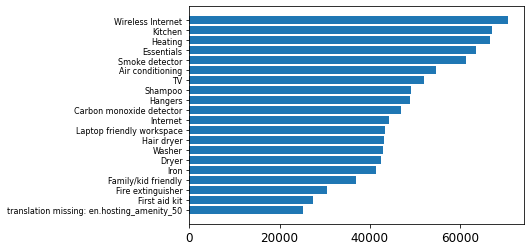

In [57]:
sorted_values = sorted(amenities_map.values()) # Sort the values
sorted_dict = {}
for i in sorted_values:
    for k in amenities_map.keys():
        if amenities_map[k] == i:
            sorted_dict[k] = amenities_map[k]
            break

keys = sorted_dict.keys()

values = sorted_dict.values()

plt.xticks(fontsize=12)
n = 20
plt.barh(list(keys)[-n:], list(values)[-n:], align='center')


In [58]:
data['amenities_count'] = pd.Series(amenities_col)

In [59]:
data = data.drop(['amenities'], axis=1)

In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73579 entries, 0 to 74110
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   log_price               73579 non-null  float64
 1   property_type           73579 non-null  object 
 2   room_type               73579 non-null  object 
 3   accommodates            73579 non-null  int64  
 4   bathrooms               73579 non-null  float64
 5   bed_type                73579 non-null  object 
 6   cancellation_policy     73579 non-null  object 
 7   cleaning_fee            73579 non-null  bool   
 8   city                    73579 non-null  object 
 9   host_identity_verified  73579 non-null  object 
 10  host_since              73579 non-null  object 
 11  instant_bookable        73579 non-null  object 
 12  number_of_reviews       73579 non-null  int64  
 13  review_scores_rating    56989 non-null  float64
 14  bedrooms                73579 non-null

In [61]:
data.head()

log_price property_type        room_type  accommodates  bathrooms  \
0   5.010635     Apartment  Entire home/apt             3        1.0   
1   5.129899     Apartment  Entire home/apt             7        1.0   
2   4.976734     Apartment  Entire home/apt             5        1.0   
3   6.620073         House  Entire home/apt             4        1.0   
4   4.744932     Apartment  Entire home/apt             2        1.0   

   bed_type cancellation_policy  cleaning_fee city host_identity_verified  \
0  Real Bed              strict          True  NYC                      t   
1  Real Bed              strict          True  NYC                      f   
2  Real Bed            moderate          True  NYC                      t   
3  Real Bed            flexible          True   SF                      t   
4  Real Bed            moderate          True   DC                      t   

   host_since instant_bookable  number_of_reviews  review_scores_rating  \
0  2012-03-26                f                  2                 100.0   
1  2017-06-19                t                  6                  93.0   
2  2016-10-25                t                 10                  92.0   
3  2015-04-19                f                  0                   NaN   
4  2015-03-01                t                  4                  40.0   

   bedrooms  beds  amenities_count  
0       1.0   1.0              8.0  
1       3.0   3.0             14.0  
2       1.0   3.0             18.0  
3       2.0   2.0             14.0  
4       0.0   1.0             11.0

In [62]:
from sklearn.preprocessing import OrdinalEncoder
import numpy as np

data_cat1 = data[["property_type"]]

ordinal_encoder = OrdinalEncoder()
data_encoded = ordinal_encoder.fit_transform(data_cat1)
ordinal_encoder.categories_

[array(['Apartment', 'Bed & Breakfast', 'Boat', 'Boutique hotel',
        'Bungalow', 'Cabin', 'Camper/RV', 'Casa particular', 'Castle',
        'Cave', 'Chalet', 'Condominium', 'Dorm', 'Earth House',
        'Guest suite', 'Guesthouse', 'Hostel', 'House', 'Hut', 'In-law',
        'Island', 'Lighthouse', 'Loft', 'Other', 'Serviced apartment',
        'Tent', 'Timeshare', 'Tipi', 'Townhouse', 'Train', 'Treehouse',
        'Vacation home', 'Villa', 'Yurt'], dtype=object)]

In [63]:
data_cat2 = data[["room_type"]]
ordinal_encoder = OrdinalEncoder()
data_encoded = ordinal_encoder.fit_transform(data_cat2)
ordinal_encoder.categories_

[array(['Entire home/apt', 'Private room', 'Shared room'], dtype=object)]

In [64]:
data_cat3 = data[["bed_type"]]
ordinal_encoder = OrdinalEncoder()
data_encoded = ordinal_encoder.fit_transform(data_cat3)
ordinal_encoder.categories_

[array(['Airbed', 'Couch', 'Futon', 'Pull-out Sofa', 'Real Bed'],
       dtype=object)]

In [65]:
data_cat4 = data[["cancellation_policy"]]
ordinal_encoder = OrdinalEncoder()
data_encoded = ordinal_encoder.fit_transform(data_cat4)
ordinal_encoder.categories_

[array(['flexible', 'moderate', 'strict', 'super_strict_30',
        'super_strict_60'], dtype=object)]

In [66]:
data_cat5 = data[["cleaning_fee"]]
ordinal_encoder = OrdinalEncoder()
data_encoded = ordinal_encoder.fit_transform(data_cat5)
ordinal_encoder.categories_

[array([False,  True])]

In [67]:
data_cat6 = data[["city"]]
ordinal_encoder = OrdinalEncoder()
data_encoded = ordinal_encoder.fit_transform(data_cat6)
ordinal_encoder.categories_

[array(['Boston', 'Chicago', 'DC', 'LA', 'NYC', 'SF'], dtype=object)]

In [68]:
dummies1 = pd.get_dummies(data["property_type"])
dummies1

Apartment  Bed & Breakfast  Boat  Boutique hotel  Bungalow  Cabin  \
0              1                0     0               0         0      0   
1              1                0     0               0         0      0   
2              1                0     0               0         0      0   
3              0                0     0               0         0      0   
4              1                0     0               0         0      0   
...          ...              ...   ...             ...       ...    ...   
74106          1                0     0               0         0      0   
74107          1                0     0               0         0      0   
74108          1                0     0               0         0      0   
74109          1                0     0               0         0      0   
74110          0                0     1               0         0      0   

       Camper/RV  Casa particular  Castle  Cave  ...  Serviced apartment  \
0              0                0       0     0  ...                   0   
1              0                0       0     0  ...                   0   
2              0                0       0     0  ...                   0   
3              0                0       0     0  ...                   0   
4              0                0       0     0  ...                   0   
...          ...              ...     ...   ...  ...                 ...   
74106          0                0       0     0  ...                   0   
74107          0                0       0     0  ...                   0   
74108          0                0       0     0  ...                   0   
74109          0                0       0     0  ...                   0   
74110          0                0       0     0  ...                   0   

       Tent  Timeshare  Tipi  Townhouse  Train  Treehouse  Vacation home  \
0         0          0     0          0      0          0              0   
1         0          0     0          0      0          0              0   
2         0          0     0          0      0          0              0   
3         0          0     0          0      0          0              0   
4         0          0     0          0      0          0              0   
...     ...        ...   ...        ...    ...        ...            ...   
74106     0          0     0          0      0          0              0   
74107     0          0     0          0      0          0              0   
74108     0          0     0          0      0          0              0   
74109     0          0     0          0      0          0              0   
74110     0          0     0          0      0          0              0   

       Villa  Yurt  
0          0     0  
1          0     0  
2          0     0  
3          0     0  
4          0     0  
...      ...   ...  
74106      0     0  
74107      0     0  
74108      0     0  
74109      0     0  
74110      0     0  

[73579 rows x 34 columns]

In [69]:
dummies2 = pd.get_dummies(data["room_type"])
dummies2

Entire home/apt  Private room  Shared room
0                    1             0            0
1                    1             0            0
2                    1             0            0
3                    1             0            0
4                    1             0            0
...                ...           ...          ...
74106                0             1            0
74107                1             0            0
74108                1             0            0
74109                1             0            0
74110                1             0            0

[73579 rows x 3 columns]

In [70]:
dummies3 = pd.get_dummies(data["bed_type"])
dummies3

Airbed  Couch  Futon  Pull-out Sofa  Real Bed
0           0      0      0              0         1
1           0      0      0              0         1
2           0      0      0              0         1
3           0      0      0              0         1
4           0      0      0              0         1
...       ...    ...    ...            ...       ...
74106       0      0      0              0         1
74107       0      0      0              0         1
74108       0      0      0              0         1
74109       0      0      0              0         1
74110       0      0      0              0         1

[73579 rows x 5 columns]

In [71]:
dummies4 = pd.get_dummies(data["cancellation_policy"])
dummies4

flexible  moderate  strict  super_strict_30  super_strict_60
0             0         0       1                0                0
1             0         0       1                0                0
2             0         1       0                0                0
3             1         0       0                0                0
4             0         1       0                0                0
...         ...       ...     ...              ...              ...
74106         1         0       0                0                0
74107         0         1       0                0                0
74108         0         1       0                0                0
74109         0         0       1                0                0
74110         0         1       0                0                0

[73579 rows x 5 columns]

In [72]:
dummies5 = pd.get_dummies(data["cleaning_fee"], prefix = "cleaning_fee")
dummies5

cleaning_fee_False  cleaning_fee_True
0                       0                  1
1                       0                  1
2                       0                  1
3                       0                  1
4                       0                  1
...                   ...                ...
74106                   1                  0
74107                   0                  1
74108                   0                  1
74109                   0                  1
74110                   1                  0

[73579 rows x 2 columns]

In [73]:
dummies6 = pd.get_dummies(data["city"])
dummies6

Boston  Chicago  DC  LA  NYC  SF
0           0        0   0   0    1   0
1           0        0   0   0    1   0
2           0        0   0   0    1   0
3           0        0   0   0    0   1
4           0        0   1   0    0   0
...       ...      ...  ..  ..  ...  ..
74106       0        0   0   0    1   0
74107       0        0   0   1    0   0
74108       0        0   0   0    1   0
74109       0        0   0   0    1   0
74110       0        0   0   1    0   0

[73579 rows x 6 columns]

In [74]:
# Drop column as it is now encoded
data = data.drop('property_type',axis = 1)
# Join the encoded df
data = data.join(dummies1)
data

log_price        room_type  accommodates  bathrooms  bed_type  \
0       5.010635  Entire home/apt             3        1.0  Real Bed   
1       5.129899  Entire home/apt             7        1.0  Real Bed   
2       4.976734  Entire home/apt             5        1.0  Real Bed   
3       6.620073  Entire home/apt             4        1.0  Real Bed   
4       4.744932  Entire home/apt             2        1.0  Real Bed   
...          ...              ...           ...        ...       ...   
74106   4.605170     Private room             1        1.0  Real Bed   
74107   5.043425  Entire home/apt             4        2.0  Real Bed   
74108   5.220356  Entire home/apt             5        1.0  Real Bed   
74109   5.273000  Entire home/apt             2        1.0  Real Bed   
74110   4.852030  Entire home/apt             4        1.0  Real Bed   

      cancellation_policy  cleaning_fee city host_identity_verified  \
0                  strict          True  NYC                      t   
1                  strict          True  NYC                      f   
2                moderate          True  NYC                      t   
3                flexible          True   SF                      t   
4                moderate          True   DC                      t   
...                   ...           ...  ...                    ...   
74106            flexible         False  NYC                      t   
74107            moderate          True   LA                      f   
74108            moderate          True  NYC                      t   
74109              strict          True  NYC                      f   
74110            moderate         False   LA                      t   

       host_since  ... Serviced apartment  Tent  Timeshare  Tipi  Townhouse  \
0      2012-03-26  ...                  0     0          0     0          0   
1      2017-06-19  ...                  0     0          0     0          0   
2      2016-10-25  ...                  0     0          0     0          0   
3      2015-04-19  ...                  0     0          0     0          0   
4      2015-03-01  ...                  0     0          0     0          0   
...           ...  ...                ...   ...        ...   ...        ...   
74106  2013-03-24  ...                  0     0          0     0          0   
74107  2016-05-03  ...                  0     0          0     0          0   
74108  2012-01-05  ...                  0     0          0     0          0   
74109  2017-09-17  ...                  0     0          0     0          0   
74110  2012-11-26  ...                  0     0          0     0          0   

       Train  Treehouse  Vacation home  Villa  Yurt  
0          0          0              0      0     0  
1          0          0              0      0     0  
2          0          0              0      0     0  
3          0          0              0      0     0  
4          0          0              0      0     0  
...      ...        ...            ...    ...   ...  
74106      0          0              0      0     0  
74107      0          0              0      0     0  
74108      0          0              0      0     0  
74109      0          0              0      0     0  
74110      0          0              0      0     0  

[73579 rows x 50 columns]

In [75]:
# Drop column as it is now encoded
data = data.drop('room_type',axis = 1)
# Join the encoded df
data = data.join(dummies2)
data

log_price  accommodates  bathrooms  bed_type cancellation_policy  \
0       5.010635             3        1.0  Real Bed              strict   
1       5.129899             7        1.0  Real Bed              strict   
2       4.976734             5        1.0  Real Bed            moderate   
3       6.620073             4        1.0  Real Bed            flexible   
4       4.744932             2        1.0  Real Bed            moderate   
...          ...           ...        ...       ...                 ...   
74106   4.605170             1        1.0  Real Bed            flexible   
74107   5.043425             4        2.0  Real Bed            moderate   
74108   5.220356             5        1.0  Real Bed            moderate   
74109   5.273000             2        1.0  Real Bed              strict   
74110   4.852030             4        1.0  Real Bed            moderate   

       cleaning_fee city host_identity_verified  host_since instant_bookable  \
0              True  NYC                      t  2012-03-26                f   
1              True  NYC                      f  2017-06-19                t   
2              True  NYC                      t  2016-10-25                t   
3              True   SF                      t  2015-04-19                f   
4              True   DC                      t  2015-03-01                t   
...             ...  ...                    ...         ...              ...   
74106         False  NYC                      t  2013-03-24                f   
74107          True   LA                      f  2016-05-03                f   
74108          True  NYC                      t  2012-01-05                t   
74109          True  NYC                      f  2017-09-17                t   
74110         False   LA                      t  2012-11-26                f   

       ...  Tipi  Townhouse  Train  Treehouse  Vacation home  Villa  Yurt  \
0      ...     0          0      0          0              0      0     0   
1      ...     0          0      0          0              0      0     0   
2      ...     0          0      0          0              0      0     0   
3      ...     0          0      0          0              0      0     0   
4      ...     0          0      0          0              0      0     0   
...    ...   ...        ...    ...        ...            ...    ...   ...   
74106  ...     0          0      0          0              0      0     0   
74107  ...     0          0      0          0              0      0     0   
74108  ...     0          0      0          0              0      0     0   
74109  ...     0          0      0          0              0      0     0   
74110  ...     0          0      0          0              0      0     0   

       Entire home/apt  Private room  Shared room  
0                    1             0            0  
1                    1             0            0  
2                    1             0            0  
3                    1             0            0  
4                    1             0            0  
...                ...           ...          ...  
74106                0             1            0  
74107                1             0            0  
74108                1             0            0  
74109                1             0            0  
74110                1             0            0  

[73579 rows x 52 columns]

In [76]:
# Drop column as it is now encoded
data = data.drop('bed_type',axis = 1)
# Join the encoded df
data = data.join(dummies3)
data

log_price  accommodates  bathrooms cancellation_policy  cleaning_fee  \
0       5.010635             3        1.0              strict          True   
1       5.129899             7        1.0              strict          True   
2       4.976734             5        1.0            moderate          True   
3       6.620073             4        1.0            flexible          True   
4       4.744932             2        1.0            moderate          True   
...          ...           ...        ...                 ...           ...   
74106   4.605170             1        1.0            flexible         False   
74107   5.043425             4        2.0            moderate          True   
74108   5.220356             5        1.0            moderate          True   
74109   5.273000             2        1.0              strict          True   
74110   4.852030             4        1.0            moderate         False   

      city host_identity_verified  host_since instant_bookable  \
0      NYC                      t  2012-03-26                f   
1      NYC                      f  2017-06-19                t   
2      NYC                      t  2016-10-25                t   
3       SF                      t  2015-04-19                f   
4       DC                      t  2015-03-01                t   
...    ...                    ...         ...              ...   
74106  NYC                      t  2013-03-24                f   
74107   LA                      f  2016-05-03                f   
74108  NYC                      t  2012-01-05                t   
74109  NYC                      f  2017-09-17                t   
74110   LA                      t  2012-11-26                f   

       number_of_reviews  ...  Villa  Yurt  Entire home/apt  Private room  \
0                      2  ...      0     0                1             0   
1                      6  ...      0     0                1             0   
2                     10  ...      0     0                1             0   
3                      0  ...      0     0                1             0   
4                      4  ...      0     0                1             0   
...                  ...  ...    ...   ...              ...           ...   
74106                  0  ...      0     0                0             1   
74107                 16  ...      0     0                1             0   
74108                 43  ...      0     0                1             0   
74109                  0  ...      0     0                1             0   
74110                205  ...      0     0                1             0   

       Shared room  Airbed  Couch  Futon  Pull-out Sofa  Real Bed  
0                0       0      0      0              0         1  
1                0       0      0      0              0         1  
2                0       0      0      0              0         1  
3                0       0      0      0              0         1  
4                0       0      0      0              0         1  
...            ...     ...    ...    ...            ...       ...  
74106            0       0      0      0              0         1  
74107            0       0      0      0              0         1  
74108            0       0      0      0              0         1  
74109            0       0      0      0              0         1  
74110            0       0      0      0              0         1  

[73579 rows x 56 columns]

In [77]:
# Drop column as it is now encoded
data = data.drop('cancellation_policy',axis = 1)
# Join the encoded df
data = data.join(dummies4)
data

log_price  accommodates  bathrooms  cleaning_fee city  \
0       5.010635             3        1.0          True  NYC   
1       5.129899             7        1.0          True  NYC   
2       4.976734             5        1.0          True  NYC   
3       6.620073             4        1.0          True   SF   
4       4.744932             2        1.0          True   DC   
...          ...           ...        ...           ...  ...   
74106   4.605170             1        1.0         False  NYC   
74107   5.043425             4        2.0          True   LA   
74108   5.220356             5        1.0          True  NYC   
74109   5.273000             2        1.0          True  NYC   
74110   4.852030             4        1.0         False   LA   

      host_identity_verified  host_since instant_bookable  number_of_reviews  \
0                          t  2012-03-26                f                  2   
1                          f  2017-06-19                t                  6   
2                          t  2016-10-25                t                 10   
3                          t  2015-04-19                f                  0   
4                          t  2015-03-01                t                  4   
...                      ...         ...              ...                ...   
74106                      t  2013-03-24                f                  0   
74107                      f  2016-05-03                f                 16   
74108                      t  2012-01-05                t                 43   
74109                      f  2017-09-17                t                  0   
74110                      t  2012-11-26                f                205   

       review_scores_rating  ...  Airbed  Couch  Futon  Pull-out Sofa  \
0                     100.0  ...       0      0      0              0   
1                      93.0  ...       0      0      0              0   
2                      92.0  ...       0      0      0              0   
3                       NaN  ...       0      0      0              0   
4                      40.0  ...       0      0      0              0   
...                     ...  ...     ...    ...    ...            ...   
74106                   NaN  ...       0      0      0              0   
74107                  93.0  ...       0      0      0              0   
74108                  94.0  ...       0      0      0              0   
74109                   NaN  ...       0      0      0              0   
74110                  96.0  ...       0      0      0              0   

       Real Bed  flexible  moderate  strict  super_strict_30  super_strict_60  
0             1         0         0       1                0                0  
1             1         0         0       1                0                0  
2             1         0         1       0                0                0  
3             1         1         0       0                0                0  
4             1         0         1       0                0                0  
...         ...       ...       ...     ...              ...              ...  
74106         1         1         0       0                0                0  
74107         1         0         1       0                0                0  
74108         1         0         1       0                0                0  
74109         1         0         0       1                0                0  
74110         1         0         1       0                0                0  

[73579 rows x 60 columns]

In [78]:
# Drop column as it is now encoded
data = data.drop('cleaning_fee',axis = 1)
# Join the encoded df
data = data.join(dummies5)
data

log_price  accommodates  bathrooms city host_identity_verified  \
0       5.010635             3        1.0  NYC                      t   
1       5.129899             7        1.0  NYC                      f   
2       4.976734             5        1.0  NYC                      t   
3       6.620073             4        1.0   SF                      t   
4       4.744932             2        1.0   DC                      t   
...          ...           ...        ...  ...                    ...   
74106   4.605170             1        1.0  NYC                      t   
74107   5.043425             4        2.0   LA                      f   
74108   5.220356             5        1.0  NYC                      t   
74109   5.273000             2        1.0  NYC                      f   
74110   4.852030             4        1.0   LA                      t   

       host_since instant_bookable  number_of_reviews  review_scores_rating  \
0      2012-03-26                f                  2                 100.0   
1      2017-06-19                t                  6                  93.0   
2      2016-10-25                t                 10                  92.0   
3      2015-04-19                f                  0                   NaN   
4      2015-03-01                t                  4                  40.0   
...           ...              ...                ...                   ...   
74106  2013-03-24                f                  0                   NaN   
74107  2016-05-03                f                 16                  93.0   
74108  2012-01-05                t                 43                  94.0   
74109  2017-09-17                t                  0                   NaN   
74110  2012-11-26                f                205                  96.0   

       bedrooms  ...  Futon  Pull-out Sofa  Real Bed  flexible  moderate  \
0           1.0  ...      0              0         1         0         0   
1           3.0  ...      0              0         1         0         0   
2           1.0  ...      0              0         1         0         1   
3           2.0  ...      0              0         1         1         0   
4           0.0  ...      0              0         1         0         1   
...         ...  ...    ...            ...       ...       ...       ...   
74106       1.0  ...      0              0         1         1         0   
74107       2.0  ...      0              0         1         0         1   
74108       2.0  ...      0              0         1         0         1   
74109       0.0  ...      0              0         1         0         0   
74110       1.0  ...      0              0         1         0         1   

       strict  super_strict_30  super_strict_60  cleaning_fee_False  \
0           1                0                0                   0   
1           1                0                0                   0   
2           0                0                0                   0   
3           0                0                0                   0   
4           0                0                0                   0   
...       ...              ...              ...                 ...   
74106       0                0                0                   1   
74107       0                0                0                   0   
74108       0                0                0                   0   
74109       1                0                0                   0   
74110       0                0                0                   1   

       cleaning_fee_True  
0                      1  
1                      1  
2                      1  
3                      1  
4                      1  
...                  ...  
74106                  0  
74107                  1  
74108                  1  
74109                  1  
74110                  0  

[73579 rows x 61 columns]

In [79]:
# Drop column as it is now encoded
data = data.drop('city',axis = 1)
# Join the encoded df
data = data.join(dummies6)
data

log_price  accommodates  bathrooms host_identity_verified  host_since  \
0       5.010635             3        1.0                      t  2012-03-26   
1       5.129899             7        1.0                      f  2017-06-19   
2       4.976734             5        1.0                      t  2016-10-25   
3       6.620073             4        1.0                      t  2015-04-19   
4       4.744932             2        1.0                      t  2015-03-01   
...          ...           ...        ...                    ...         ...   
74106   4.605170             1        1.0                      t  2013-03-24   
74107   5.043425             4        2.0                      f  2016-05-03   
74108   5.220356             5        1.0                      t  2012-01-05   
74109   5.273000             2        1.0                      f  2017-09-17   
74110   4.852030             4        1.0                      t  2012-11-26   

      instant_bookable  number_of_reviews  review_scores_rating  bedrooms  \
0                    f                  2                 100.0       1.0   
1                    t                  6                  93.0       3.0   
2                    t                 10                  92.0       1.0   
3                    f                  0                   NaN       2.0   
4                    t                  4                  40.0       0.0   
...                ...                ...                   ...       ...   
74106                f                  0                   NaN       1.0   
74107                f                 16                  93.0       2.0   
74108                t                 43                  94.0       2.0   
74109                t                  0                   NaN       0.0   
74110                f                205                  96.0       1.0   

       beds  ...  super_strict_30  super_strict_60  cleaning_fee_False  \
0       1.0  ...                0                0                   0   
1       3.0  ...                0                0                   0   
2       3.0  ...                0                0                   0   
3       2.0  ...                0                0                   0   
4       1.0  ...                0                0                   0   
...     ...  ...              ...              ...                 ...   
74106   1.0  ...                0                0                   1   
74107   4.0  ...                0                0                   0   
74108   2.0  ...                0                0                   0   
74109   2.0  ...                0                0                   0   
74110   2.0  ...                0                0                   1   

       cleaning_fee_True  Boston  Chicago  DC  LA  NYC  SF  
0                      1       0        0   0   0    1   0  
1                      1       0        0   0   0    1   0  
2                      1       0        0   0   0    1   0  
3                      1       0        0   0   0    0   1  
4                      1       0        0   1   0    0   0  
...                  ...     ...      ...  ..  ..  ...  ..  
74106                  0       0        0   0   0    1   0  
74107                  1       0        0   0   1    0   0  
74108                  1       0        0   0   0    1   0  
74109                  1       0        0   0   0    1   0  
74110                  0       0        0   0   1    0   0  

[73579 rows x 66 columns]

In [80]:
from datetime import datetime
from datetime import date

In [81]:
# This function converts given date to age
def age(old_date):
    old_date = datetime.strptime(old_date, "%Y-%m-%d")
    today =  datetime.strptime(str(date.today()).split()[0], "%Y-%m-%d")
    return abs((today-old_date).days)


In [82]:
data['host_since'] = data['host_since'].apply(age)

display(data)

log_price  accommodates  bathrooms host_identity_verified  host_since  \
0       5.010635             3        1.0                      t        3590   
1       5.129899             7        1.0                      f        1679   
2       4.976734             5        1.0                      t        1916   
3       6.620073             4        1.0                      t        2471   
4       4.744932             2        1.0                      t        2520   
...          ...           ...        ...                    ...         ...   
74106   4.605170             1        1.0                      t        3227   
74107   5.043425             4        2.0                      f        2091   
74108   5.220356             5        1.0                      t        3671   
74109   5.273000             2        1.0                      f        1589   
74110   4.852030             4        1.0                      t        3345   

      instant_bookable  number_of_reviews  review_scores_rating  bedrooms  \
0                    f                  2                 100.0       1.0   
1                    t                  6                  93.0       3.0   
2                    t                 10                  92.0       1.0   
3                    f                  0                   NaN       2.0   
4                    t                  4                  40.0       0.0   
...                ...                ...                   ...       ...   
74106                f                  0                   NaN       1.0   
74107                f                 16                  93.0       2.0   
74108                t                 43                  94.0       2.0   
74109                t                  0                   NaN       0.0   
74110                f                205                  96.0       1.0   

       beds  ...  super_strict_30  super_strict_60  cleaning_fee_False  \
0       1.0  ...                0                0                   0   
1       3.0  ...                0                0                   0   
2       3.0  ...                0                0                   0   
3       2.0  ...                0                0                   0   
4       1.0  ...                0                0                   0   
...     ...  ...              ...              ...                 ...   
74106   1.0  ...                0                0                   1   
74107   4.0  ...                0                0                   0   
74108   2.0  ...                0                0                   0   
74109   2.0  ...                0                0                   0   
74110   2.0  ...                0                0                   1   

       cleaning_fee_True  Boston  Chicago  DC  LA  NYC  SF  
0                      1       0        0   0   0    1   0  
1                      1       0        0   0   0    1   0  
2                      1       0        0   0   0    1   0  
3                      1       0        0   0   0    0   1  
4                      1       0        0   1   0    0   0  
...                  ...     ...      ...  ..  ..  ...  ..  
74106                  0       0        0   0   0    1   0  
74107                  1       0        0   0   1    0   0  
74108                  1       0        0   0   0    1   0  
74109                  1       0        0   0   0    1   0  
74110                  0       0        0   0   1    0   0  

[73579 rows x 66 columns]

In [83]:
host = {'t': 1,'f': 0}
data.host_identity_verified = [host[item] for item in data.host_identity_verified]
data.instant_bookable = [host[item] for item in data.instant_bookable]
data

log_price  accommodates  bathrooms  host_identity_verified  host_since  \
0       5.010635             3        1.0                       1        3590   
1       5.129899             7        1.0                       0        1679   
2       4.976734             5        1.0                       1        1916   
3       6.620073             4        1.0                       1        2471   
4       4.744932             2        1.0                       1        2520   
...          ...           ...        ...                     ...         ...   
74106   4.605170             1        1.0                       1        3227   
74107   5.043425             4        2.0                       0        2091   
74108   5.220356             5        1.0                       1        3671   
74109   5.273000             2        1.0                       0        1589   
74110   4.852030             4        1.0                       1        3345   

       instant_bookable  number_of_reviews  review_scores_rating  bedrooms  \
0                     0                  2                 100.0       1.0   
1                     1                  6                  93.0       3.0   
2                     1                 10                  92.0       1.0   
3                     0                  0                   NaN       2.0   
4                     1                  4                  40.0       0.0   
...                 ...                ...                   ...       ...   
74106                 0                  0                   NaN       1.0   
74107                 0                 16                  93.0       2.0   
74108                 1                 43                  94.0       2.0   
74109                 1                  0                   NaN       0.0   
74110                 0                205                  96.0       1.0   

       beds  ...  super_strict_30  super_strict_60  cleaning_fee_False  \
0       1.0  ...                0                0                   0   
1       3.0  ...                0                0                   0   
2       3.0  ...                0                0                   0   
3       2.0  ...                0                0                   0   
4       1.0  ...                0                0                   0   
...     ...  ...              ...              ...                 ...   
74106   1.0  ...                0                0                   1   
74107   4.0  ...                0                0                   0   
74108   2.0  ...                0                0                   0   
74109   2.0  ...                0                0                   0   
74110   2.0  ...                0                0                   1   

       cleaning_fee_True  Boston  Chicago  DC  LA  NYC  SF  
0                      1       0        0   0   0    1   0  
1                      1       0        0   0   0    1   0  
2                      1       0        0   0   0    1   0  
3                      1       0        0   0   0    0   1  
4                      1       0        0   1   0    0   0  
...                  ...     ...      ...  ..  ..  ...  ..  
74106                  0       0        0   0   0    1   0  
74107                  1       0        0   0   1    0   0  
74108                  1       0        0   0   0    1   0  
74109                  1       0        0   0   0    1   0  
74110                  0       0        0   0   1    0   0  

[73579 rows x 66 columns]

In [84]:
data.reset_index(drop = True)

log_price  accommodates  bathrooms  host_identity_verified  host_since  \
0       5.010635             3        1.0                       1        3590   
1       5.129899             7        1.0                       0        1679   
2       4.976734             5        1.0                       1        1916   
3       6.620073             4        1.0                       1        2471   
4       4.744932             2        1.0                       1        2520   
...          ...           ...        ...                     ...         ...   
73574   4.605170             1        1.0                       1        3227   
73575   5.043425             4        2.0                       0        2091   
73576   5.220356             5        1.0                       1        3671   
73577   5.273000             2        1.0                       0        1589   
73578   4.852030             4        1.0                       1        3345   

       instant_bookable  number_of_reviews  review_scores_rating  bedrooms  \
0                     0                  2                 100.0       1.0   
1                     1                  6                  93.0       3.0   
2                     1                 10                  92.0       1.0   
3                     0                  0                   NaN       2.0   
4                     1                  4                  40.0       0.0   
...                 ...                ...                   ...       ...   
73574                 0                  0                   NaN       1.0   
73575                 0                 16                  93.0       2.0   
73576                 1                 43                  94.0       2.0   
73577                 1                  0                   NaN       0.0   
73578                 0                205                  96.0       1.0   

       beds  ...  super_strict_30  super_strict_60  cleaning_fee_False  \
0       1.0  ...                0                0                   0   
1       3.0  ...                0                0                   0   
2       3.0  ...                0                0                   0   
3       2.0  ...                0                0                   0   
4       1.0  ...                0                0                   0   
...     ...  ...              ...              ...                 ...   
73574   1.0  ...                0                0                   1   
73575   4.0  ...                0                0                   0   
73576   2.0  ...                0                0                   0   
73577   2.0  ...                0                0                   0   
73578   2.0  ...                0                0                   1   

       cleaning_fee_True  Boston  Chicago  DC  LA  NYC  SF  
0                      1       0        0   0   0    1   0  
1                      1       0        0   0   0    1   0  
2                      1       0        0   0   0    1   0  
3                      1       0        0   0   0    0   1  
4                      1       0        0   1   0    0   0  
...                  ...     ...      ...  ..  ..  ...  ..  
73574                  0       0        0   0   0    1   0  
73575                  1       0        0   0   1    0   0  
73576                  1       0        0   0   0    1   0  
73577                  1       0        0   0   0    1   0  
73578                  0       0        0   0   1    0   0  

[73579 rows x 66 columns]

### Filling missing values in the dataset

In [85]:
#Since review_scores_rating has many missing values, we fill them with median values
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

In [86]:
imputer.fit(data)

SimpleImputer(strategy='median')

In [87]:
imputer.statistics_

array([4.71849887e+00, 2.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       2.67100000e+03, 0.00000000e+00, 6.00000000e+00, 9.60000000e+01,
       1.00000000e+00, 1.00000000e+00, 1.60000000e+01, 1.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

In [88]:
data.median().values

array([4.71849887e+00, 2.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       2.67100000e+03, 0.00000000e+00, 6.00000000e+00, 9.60000000e+01,
       1.00000000e+00, 1.00000000e+00, 1.60000000e+01, 1.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

In [89]:
X = imputer.transform(data)

In [90]:
data_tr = pd.DataFrame(X, columns=data.columns,
                          index=data.index)

In [91]:
data_tr

log_price  accommodates  bathrooms  host_identity_verified  host_since  \
0       5.010635           3.0        1.0                     1.0      3590.0   
1       5.129899           7.0        1.0                     0.0      1679.0   
2       4.976734           5.0        1.0                     1.0      1916.0   
3       6.620073           4.0        1.0                     1.0      2471.0   
4       4.744932           2.0        1.0                     1.0      2520.0   
...          ...           ...        ...                     ...         ...   
74106   4.605170           1.0        1.0                     1.0      3227.0   
74107   5.043425           4.0        2.0                     0.0      2091.0   
74108   5.220356           5.0        1.0                     1.0      3671.0   
74109   5.273000           2.0        1.0                     0.0      1589.0   
74110   4.852030           4.0        1.0                     1.0      3345.0   

       instant_bookable  number_of_reviews  review_scores_rating  bedrooms  \
0                   0.0                2.0                 100.0       1.0   
1                   1.0                6.0                  93.0       3.0   
2                   1.0               10.0                  92.0       1.0   
3                   0.0                0.0                  96.0       2.0   
4                   1.0                4.0                  40.0       0.0   
...                 ...                ...                   ...       ...   
74106               0.0                0.0                  96.0       1.0   
74107               0.0               16.0                  93.0       2.0   
74108               1.0               43.0                  94.0       2.0   
74109               1.0                0.0                  96.0       0.0   
74110               0.0              205.0                  96.0       1.0   

       beds  ...  super_strict_30  super_strict_60  cleaning_fee_False  \
0       1.0  ...              0.0              0.0                 0.0   
1       3.0  ...              0.0              0.0                 0.0   
2       3.0  ...              0.0              0.0                 0.0   
3       2.0  ...              0.0              0.0                 0.0   
4       1.0  ...              0.0              0.0                 0.0   
...     ...  ...              ...              ...                 ...   
74106   1.0  ...              0.0              0.0                 1.0   
74107   4.0  ...              0.0              0.0                 0.0   
74108   2.0  ...              0.0              0.0                 0.0   
74109   2.0  ...              0.0              0.0                 0.0   
74110   2.0  ...              0.0              0.0                 1.0   

       cleaning_fee_True  Boston  Chicago   DC   LA  NYC   SF  
0                    1.0     0.0      0.0  0.0  0.0  1.0  0.0  
1                    1.0     0.0      0.0  0.0  0.0  1.0  0.0  
2                    1.0     0.0      0.0  0.0  0.0  1.0  0.0  
3                    1.0     0.0      0.0  0.0  0.0  0.0  1.0  
4                    1.0     0.0      0.0  1.0  0.0  0.0  0.0  
...                  ...     ...      ...  ...  ...  ...  ...  
74106                0.0     0.0      0.0  0.0  0.0  1.0  0.0  
74107                1.0     0.0      0.0  0.0  1.0  0.0  0.0  
74108                1.0     0.0      0.0  0.0  0.0  1.0  0.0  
74109                1.0     0.0      0.0  0.0  0.0  1.0  0.0  
74110                0.0     0.0      0.0  0.0  1.0  0.0  0.0  

[73579 rows x 66 columns]

In [92]:
pd.set_option('display.max_columns', None)
data_tr.corr()

log_price  accommodates  bathrooms  \
log_price                1.000000      0.568098   0.355671   
accommodates             0.568098      1.000000   0.505900   
bathrooms                0.355671      0.505900   1.000000   
host_identity_verified   0.023667      0.057919   0.014644   
host_since               0.079335     -0.006772  -0.004559   
...                           ...           ...        ...   
Chicago                 -0.052181      0.069960   0.018700   
DC                       0.082206      0.051399   0.039103   
LA                      -0.056820      0.076997   0.130353   
NYC                     -0.077028     -0.137339  -0.157559   
SF                       0.167321      0.001863   0.012647   

                        host_identity_verified  host_since  instant_bookable  \
log_price                             0.023667    0.079335         -0.043912   
accommodates                          0.057919   -0.006772          0.053202   
bathrooms                             0.014644   -0.004559          0.001533   
host_identity_verified                1.000000    0.335846         -0.087578   
host_since                            0.335846    1.000000         -0.191454   
...                                        ...         ...               ...   
Chicago                               0.056091   -0.012864          0.011542   
DC                                    0.012462   -0.000963          0.022609   
LA                                    0.034009   -0.039994          0.012190   
NYC                                  -0.066230    0.010957         -0.035009   
SF                                    0.028890    0.084410         -0.016526   

                        number_of_reviews  review_scores_rating  bedrooms  \
log_price                       -0.032019              0.083529  0.473524   
accommodates                     0.042423             -0.022010  0.709689   
bathrooms                       -0.041417              0.012294  0.590047   
host_identity_verified           0.162678              0.020677  0.025772   
host_since                       0.204094              0.024041  0.013305   
...                                   ...                   ...       ...   
Chicago                          0.032217              0.023866  0.048128   
DC                              -0.007609              0.026898  0.022390   
LA                               0.006892              0.018656  0.053333   
NYC                             -0.064966             -0.054510 -0.108338   
SF                               0.063978              0.032213  0.029812   

                            beds  amenities_count  Apartment  Bed & Breakfast  \
log_price               0.442349        -0.003781  -0.045653        -0.024456   
accommodates            0.810810        -0.006107  -0.166339        -0.027319   
bathrooms               0.525580        -0.002292  -0.255125         0.004638   
host_identity_verified  0.035934         0.002616  -0.011157        -0.018693   
host_since             -0.021679         0.003634   0.014712         0.005582   
...                          ...              ...        ...              ...   
Chicago                 0.036682        -0.002294   0.006513        -0.005589   
DC                      0.022070        -0.001011  -0.071816         0.010267   
LA                      0.080467        -0.004431  -0.299242         0.034709   
NYC                    -0.107073         0.003521   0.349632        -0.037247   
SF                      0.000986         0.005008  -0.073419         0.006880   

                            Boat  Boutique hotel  Bungalow     Cabin  \
log_price               0.017312        0.012822 -0.000095 -0.006302   
accommodates            0.003510        0.001421 -0.006704 -0.011454   
bathrooms              -0.003408       -0.007835 -0.021621 -0.006201   
host_identity_verified -0.007571       -0.028832  0.009181 -0.000748   
host_since             -0.003476       -0.031754  0.008144  

In [93]:
data_tr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73579 entries, 0 to 74110
Data columns (total 66 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   log_price               73579 non-null  float64
 1   accommodates            73579 non-null  float64
 2   bathrooms               73579 non-null  float64
 3   host_identity_verified  73579 non-null  float64
 4   host_since              73579 non-null  float64
 5   instant_bookable        73579 non-null  float64
 6   number_of_reviews       73579 non-null  float64
 7   review_scores_rating    73579 non-null  float64
 8   bedrooms                73579 non-null  float64
 9   beds                    73579 non-null  float64
 10  amenities_count         73579 non-null  float64
 11  Apartment               73579 non-null  float64
 12  Bed & Breakfast         73579 non-null  float64
 13  Boat                    73579 non-null  float64
 14  Boutique hotel          73579 non-null

## Prediction Modeling

In [94]:
X = data_tr.iloc[:,1:66]
y = data_tr.iloc[:,0]


#### Splitting into Train and Test Set

In [95]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

#### Linear Regression

In [96]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [97]:
r_sq = model.score(X_test, y_test)
print('coefficient of determination:', r_sq)

print('intercept:', model.intercept_)

print('slope:', model.coef_)


coefficient of determination: 0.5576526302608427
intercept: 3.573541295500016
slope: [ 8.36156915e-02  1.58427382e-01 -3.52152845e-02  4.56051041e-05
 -4.00613685e-02 -7.82695511e-04  6.89150281e-03  1.39826638e-01
 -4.18099199e-02 -4.11147284e-04 -1.16397318e-01  5.04825266e-02
  1.17325052e-01  2.17773063e-01 -1.54262821e-01 -2.37618052e-01
 -1.98597017e-01  3.10955987e-01  2.52101537e-01  1.66147180e-01
  1.03966724e-01  1.71927585e-02 -6.36263698e-01  4.46435142e-01
 -2.00612262e-01 -1.84377524e-01 -6.19662400e-01 -1.50782877e-01
 -6.21125951e-01 -4.07829232e-01  6.83241089e-01 -7.21644966e-16
  3.49665172e-02  2.69408650e-02  2.29620925e-01 -3.95043280e-01
  4.44408461e-01  5.80991514e-01 -1.28794918e-01  4.94245369e-01
 -2.96861377e-01  1.54629513e-01  1.56495229e-03  1.52395519e-02
  5.58686026e-01 -6.16296033e-02 -4.97056422e-01 -2.90584389e-02
  6.79406247e-02 -6.86476071e-02  1.78257034e-02  1.19397180e-02
 -2.01835279e-01 -2.47242159e-01 -2.03017738e-01  3.35262271e-02
  6.1

In [98]:
from sklearn.metrics import mean_squared_error

y_pred = model.predict(X_test)
lin_mse = mean_squared_error(y_pred, y_test)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

0.47490395162763716

#### Decision Tree Regressor

In [99]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [100]:
y_pred1 = tree_reg.predict(X_test)
tree_mse = mean_squared_error(y_pred1, y_test)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.6317390914740825

#### XGBoost

In [101]:
#conda install -c conda-forge xgboost

In [102]:
import xgboost as xgb
from xgboost import plot_importance
from sklearn.metrics import  mean_squared_error, r2_score


In [103]:
# Running model a XGB Regressor
xgb_reg = xgb.XGBRegressor()

# Fit the model on training data
xgb_reg.fit(X_train, y_train)

# Predict
pred_train = xgb_reg.predict(X_train)

# Validate
pred_val = xgb_reg.predict(X_test)

print("\nTraining MSE:", round(mean_squared_error(y_train, pred_train),4))
print("Validation MSE:", round(mean_squared_error(y_test, pred_val),4))
print("Training RMSE:", round(np.sqrt(mean_squared_error(y_train, pred_train)),4))
print("Validation RMSE:", round(np.sqrt(mean_squared_error(y_test, pred_val)),4))
print("\nTraining r2:", round(r2_score(y_train, pred_train),4))
print("Validation r2:", round(r2_score(y_test, pred_val),4))


Training MSE: 0.1616
Validation MSE: 0.1988
Training RMSE: 0.402
Validation RMSE: 0.4459

Training r2: 0.6882
Validation r2: 0.6101


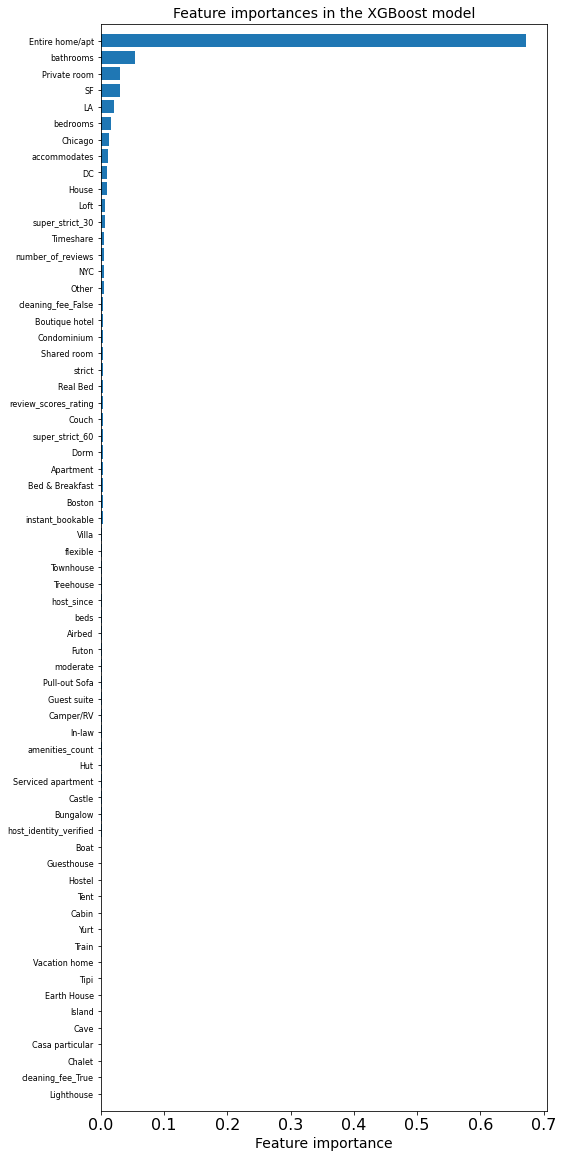

In [104]:
# Producing a dataframe of feature importances
ft_weights_xgb_reg = pd.DataFrame(xgb_reg.feature_importances_, columns=['weight'], index=X_train.columns)
ft_weights_xgb_reg.sort_values('weight', inplace=True)

# Plotting feature importances
plt.figure(figsize=(8,20))
plt.barh(ft_weights_xgb_reg.index, ft_weights_xgb_reg.weight, align='center') 
plt.title("Feature importances in the XGBoost model", fontsize=14)
plt.xlabel("Feature importance")
plt.margins(y=0.01)
plt.show()

### Better Evaluation using Cross-Validation

In [105]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, X_train, y_train,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [106]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [0.62651411 0.6315668  0.61987044 0.65283157 0.63535109 0.63134073
 0.63037588 0.63702104 0.65137506 0.64602096]
Mean: 0.6362267668205089
Standard deviation: 0.010218615356839704


In [107]:
lin_scores = cross_val_score(model, X_train, y_train,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [0.4780036  0.46072419 0.47533196 0.47358817 0.47769204 0.47932757
 0.47978761 0.47380366 0.48058606 0.47203899]
Mean: 0.4750883865793415
Standard deviation: 0.005523992239974958


In [108]:
lin_scores = cross_val_score(model, X_train, y_train,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [0.4780036  0.46072419 0.47533196 0.47358817 0.47769204 0.47932757
 0.47978761 0.47380366 0.48058606 0.47203899]
Mean: 0.4750883865793415
Standard deviation: 0.005523992239974958


#### Random Forest Regressor

In [109]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [110]:
y_pred2 = forest_reg.predict(X_test)
forest_mse = mean_squared_error(y_pred2, y_test)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

0.4568170855820679

In [111]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, X_train, y_train,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [0.45767625 0.44879179 0.44975807 0.46106951 0.45572423 0.45508
 0.45886293 0.45433468 0.46150292 0.455701  ]
Mean: 0.4558501382099835
Standard deviation: 0.004018317744231866


In [112]:
scores = cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv=10)
pd.Series(np.sqrt(-scores)).describe()

count    10.000000
mean      0.475088
std       0.005823
min       0.460724
25%       0.473642
50%       0.476512
75%       0.478997
max       0.480586
dtype: float64

### Solution

##### After comparing RMSEs of all the prediction models, XGBoost gave the lowest RMSE and hence the best results

## Fine Tuning Model

### Grid Search

In [114]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [20, 40, 60], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [20, 40], 'max_features': [4, 6, 8]},
  ]

xgb_reg = xgb.XGBRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(xgb_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(X_train, y_train)

[19:05:05] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1593723618214/work/src/learner.cc:480: 
Parameters: { max_features } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:05:09] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1593723618214/work/src/learner.cc:480: 
Parameters: { max_features } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:05:12] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1593723618214/work/src/learner.cc:480: 
Parameters: { max_features } might not be used.

  This may not be accurate due to some parameters are only used in

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=...
                                    num_parallel_tree=None, random_state=42,
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
                                    tree_method=None, validate_paramete

In [115]:
grid_search.best_params_

{'max_features': 2, 'n_estimators': 60}

In [116]:
grid_search.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             max_features=2, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=60, n_jobs=0,
             num_parallel_tree=1, random_state=42, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [117]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

0.4460794696803125 {'max_features': 2, 'n_estimators': 20}
0.4447906990932194 {'max_features': 2, 'n_estimators': 40}
0.444739401086697 {'max_features': 2, 'n_estimators': 60}
0.4460794696803125 {'max_features': 4, 'n_estimators': 20}
0.4447906990932194 {'max_features': 4, 'n_estimators': 40}
0.444739401086697 {'max_features': 4, 'n_estimators': 60}
0.4460794696803125 {'max_features': 6, 'n_estimators': 20}
0.4447906990932194 {'max_features': 6, 'n_estimators': 40}
0.444739401086697 {'max_features': 6, 'n_estimators': 60}
0.4460794696803125 {'max_features': 8, 'n_estimators': 20}
0.4447906990932194 {'max_features': 8, 'n_estimators': 40}
0.444739401086697 {'max_features': 8, 'n_estimators': 60}
0.4460794696803125 {'bootstrap': False, 'max_features': 4, 'n_estimators': 20}
0.4447906990932194 {'bootstrap': False, 'max_features': 4, 'n_estimators': 40}
0.4460794696803125 {'bootstrap': False, 'max_features': 6, 'n_estimators': 20}
0.4447906990932194 {'bootstrap': False, 'max_features': 6, 

In [118]:
pd.DataFrame(grid_search.cv_results_)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        2.598383      0.616589         0.043421        0.004977   
1        4.054913      0.028354         0.042798        0.001492   
2        5.998340      0.070636         0.048723        0.000794   
3        2.197901      0.099106         0.040342        0.000793   
4        4.332322      0.311229         0.043234        0.001053   
5        5.989413      0.040581         0.047430        0.002106   
6        2.160907      0.040430         0.040781        0.000903   
7        4.133258      0.109714         0.043368        0.001698   
8        6.124106      0.059714         0.050399        0.003013   
9        2.136095      0.017148         0.041318        0.001464   
10       4.256516      0.204641         0.044066        0.000967   
11       5.962180      0.025453         0.046670        0.002514   
12       2.137224      0.023434         0.040437        0.000974   
13       4.052900      0.013440         0.042437        0.001417   
14       2.164084      0.039587         0.040036        0.001023   
15       4.099167      0.042352         0.043201        0.000521   
16       2.266884      0.085113         0.049251        0.015817   
17       4.132406      0.134325         0.045131        0.003315   

   param_max_features param_n_estimators param_bootstrap  \
0                   2                 20             NaN   
1                   2                 40             NaN   
2                   2                 60             NaN   
3                   4                 20             NaN   
4                   4                 40             NaN   
5                   4                 60             NaN   
6                   6                 20             NaN   
7                   6                 40             NaN   
8                   6                 60             NaN   
9                   8                 20             NaN   
10                  8                 40             NaN   
11                  8                 60             NaN   
12                  4                 20           False   
13                  4                 40           False   
14                  6                 20           False   
15                  6                 40           False   
16                  8                 20           False   
17                  8                 40           False   

                                               params  split0_test_score  \
0             {'max_features': 2, 'n_estimators': 20}          -0.196130   
1             {'max_features': 2, 'n_estimators': 40}          -0.196249   
2             {'max_features': 2, 'n_estimators': 60}          -0.196569   
3             {'max_features': 4, 'n_estimators': 20}          -0.196130   
4             {'max_features': 4, 'n_estimators': 40}          -0.196249   
5             {'max_features': 4, 'n_estimators': 60}          -0.196569   
6             {'max_features': 6, 'n_estimators': 20}          -0.196130   
7             {'max_features': 6, 'n_estimators': 40}          -0.196249   
8             {'max_features': 6, 'n_estimators': 60}          -0.196569   
9             {'max_features': 8, 'n_estimators': 20}          -0.196130   
10            {'max_features': 8, 'n_estimators': 40}          -0.196249   
11            {'max_features': 8, 'n_estimators': 60}          -0.196569   
12  {'bootstrap': False, 'max_features': 4, 'n_est...          -0.196130   
13  {'bootstrap': False, 'max_features': 4, 'n_est...          -0.196249   
14  {'bootstrap': False, 'max_features': 6, 'n_est...          -0.196130   
15  {'bootstrap': False, 'max_features': 6, 'n_est...          -0.196249   
16  {'bootstrap': False, 'max_features': 8, 'n_est...          -0.196130   
17  {'bootstrap': False, 'max_features': 8, 'n_est...          -0.196249   

    split1_test_score  split2_test_score  split3_test_score  \
0           -0.196542          -0.201839          -0.199590   

### Randomized Search

In [119]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=60),
        'max_features': randint(low=1, high=8),
    }

xgb_reg = xgb.XGBRegressor(random_state=42)
rnd_search = RandomizedSearchCV(xgb_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(X_train, y_train)

[19:11:13] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1593723618214/work/src/learner.cc:480: 
Parameters: { max_features } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:11:19] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1593723618214/work/src/learner.cc:480: 
Parameters: { max_features } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:11:24] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1593723618214/work/src/learner.cc:480: 
Parameters: { max_features } might not be used.

  This may not be accurate due to some parameters are only used in

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n...
                                          random_state=42, reg_alpha=None,
                                          reg_lambda=None,
                                          scale_pos_weig

In [126]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

0.4447052451051168 {'max_features': 7, 'n_estimators': 52}
0.44828784111422315 {'max_features': 5, 'n_estimators': 15}
0.5184376012733608 {'max_features': 3, 'n_estimators': 8}
0.4458247117688863 {'max_features': 5, 'n_estimators': 21}
0.4447394882322765 {'max_features': 7, 'n_estimators': 58}
0.445570577414871 {'max_features': 3, 'n_estimators': 23}
0.45864463225840674 {'max_features': 3, 'n_estimators': 11}
0.44481151808105235 {'max_features': 5, 'n_estimators': 36}
0.44562715956832843 {'max_features': 3, 'n_estimators': 22}
2.16932798771057 {'max_features': 5, 'n_estimators': 2}


### Analyzing the best features and ranking them

In [127]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([1.2311492e-02, 5.2597873e-02, 1.0387236e-03, 2.0427222e-03,
       2.6083530e-03, 5.3740069e-03, 3.3196115e-03, 1.4998202e-02,
       1.9000700e-03, 1.2654130e-03, 3.2968267e-03, 2.5403013e-03,
       1.0596417e-03, 2.6571250e-03, 1.0670866e-03, 5.6687667e-04,
       2.0616162e-03, 0.0000000e+00, 1.2631646e-03, 0.0000000e+00,
       0.0000000e+00, 3.9843540e-03, 2.7325489e-03, 3.2328820e-04,
       1.3216413e-03, 9.2133810e-04, 7.0343929e-04, 7.7416119e-03,
       1.3858877e-03, 1.4556105e-03, 2.9351009e-04, 0.0000000e+00,
       5.9248824e-03, 4.0531773e-03, 1.1318024e-03, 1.0040650e-03,
       3.7177522e-03, 4.2657176e-04, 2.3705876e-03, 4.0211045e-04,
       2.1270986e-03, 5.0671224e-04, 2.0943873e-03, 5.1408797e-04,
       7.0936507e-01, 2.8058987e-02, 2.9317162e-03, 2.0071424e-03,
       2.5421281e-03, 1.7624177e-03, 1.6386656e-03, 3.0514710e-03,
       2.1476606e-03, 1.8182200e-03, 3.4730737e-03, 4.2243465e-03,
       2.7456572e-03, 3.7801785e-03, 0.0000000e+00, 3.2111402e

In [128]:
sorted(zip(feature_importances,X_train.columns), reverse=True)

[(0.70936507, 'Entire home/apt'),
 (0.052597873, 'bathrooms'),
 (0.028058987, 'Private room'),
 (0.025215298, 'SF'),
 (0.019933196, 'LA'),
 (0.014998202, 'bedrooms'),
 (0.012311492, 'accommodates'),
 (0.009994903, 'Chicago'),
 (0.009830292, 'DC'),
 (0.007741612, 'House'),
 (0.0059248824, 'Loft'),
 (0.005374007, 'number_of_reviews'),
 (0.0051628733, 'NYC'),
 (0.0042243465, 'super_strict_30'),
 (0.0040531773, 'Other'),
 (0.003984354, 'Condominium'),
 (0.0037801785, 'cleaning_fee_False'),
 (0.0037177522, 'Timeshare'),
 (0.0034730737, 'strict'),
 (0.0033196115, 'review_scores_rating'),
 (0.0032968267, 'Apartment'),
 (0.0032111402, 'Boston'),
 (0.003051471, 'Real Bed'),
 (0.0029317162, 'Shared room'),
 (0.0027456572, 'super_strict_60'),
 (0.0027325489, 'Dorm'),
 (0.002657125, 'Boutique hotel'),
 (0.002608353, 'instant_bookable'),
 (0.002542128, 'Couch'),
 (0.0025403013, 'Bed & Breakfast'),
 (0.0023705876, 'Townhouse'),
 (0.0021476606, 'flexible'),
 (0.0021270986, 'Treehouse'),
 (0.002094387

In [129]:
# Running model a XGB Regressor
xgb_reg = xgb.XGBRegressor()

# Fit the model on training data
xgb_reg.fit(X_train, y_train)

# Predict
pred_train = xgb_reg.predict(X_train)

# Validate
pred_val = xgb_reg.predict(X_test)

print("\nTraining MSE:", round(mean_squared_error(y_train, pred_train),4))
print("Validation MSE:", round(mean_squared_error(y_test, pred_val),4))
print("Training RMSE:", round(np.sqrt(mean_squared_error(y_train, pred_train)),4))
print("Validation RMSE:", round(np.sqrt(mean_squared_error(y_test, pred_val)),4))
print("\nTraining r2:", round(r2_score(y_train, pred_train),4))
print("Validation r2:", round(r2_score(y_test, pred_val),4))


Training MSE: 0.1616
Validation MSE: 0.1988
Training RMSE: 0.402
Validation RMSE: 0.4459

Training r2: 0.6882
Validation r2: 0.6101


In [130]:
grid_search.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             max_features=2, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=60, n_jobs=0,
             num_parallel_tree=1, random_state=42, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [131]:
grid_search.best_params_

{'max_features': 2, 'n_estimators': 60}